In [48]:
import numpy as np 
import pandas as pd
import random as rd


In [49]:
def read_csv(csv_path, agg=False):

    data=pd.read_csv(csv_path, sep="\t")
    data["m"]=data.apply(lambda x: x.file.split("_")[0], axis=1)
    data["n"]=data.apply(lambda x: x.file.split("_")[1], axis=1)
    data["sigma"]=data.apply(lambda x: x.file.split("_")[2], axis=1)
    data["index"]=data.apply(lambda x: x.file.split("_")[3], axis=1)
    data_clear = data.drop(columns=["file"], axis=1)
    if agg:
        data_clear=data_clear[["m", "n", "sigma", "index", "obj", "time"]]
        data_clear=data_clear.groupby(by=["m", "n", "sigma"]).agg({ "obj": "mean", "time": "mean"   }).reset_index()
        return data_clear
    
    return data_clear 

def merge_results(grouped_results_per_algorithm, alg_names=["DP",  "DP-1", "DP-2", "ILP" ]):

    merged_algs=grouped_results_per_algorithm[0]
    #replace names:
    merged_algs.rename(columns={"obj": "DP-obj", "time" : "DP-time"}, inplace=True)
    
    for _i, res in enumerate(grouped_results_per_algorithm[1 :]):
        res = res.rename(columns={"obj": alg_names[_i+1] + "obj", "time" : alg_names[_i+1] + "time"})
        merged_algs=merged_algs.merge(res, on=["m", "n", "sigma"], how='left')
    return merged_algs


In [50]:
data_basic_csv = read_csv("basic-dp.csv", agg=True)
data_dp1 = read_csv("dp1.csv", agg=True)
data_dp2 = read_csv("dp2.csv", agg=True)
data_ilp = read_csv("ilp.csv", agg=True)

data_dp2

,m,n,sigma,obj,time
0,2,100,2,77.4,0.040
1,2,100,4,62.3,0.080
2,2,200,2,156.4,0.159
3,2,200,4,127.2,0.306
4,2,50,2,38.1,0.010
5,2,50,4,30.3,0.020


In [51]:
results=[data_basic_csv, data_dp1, data_dp2, data_ilp]
merged=merge_results(results)
merged
#merged.to_latex("results_2d_mlgcs.csv")

,m,n,sigma,DP-obj,DP-time,DP-1obj,DP-1time,DP-2obj,DP-2time,ILPobj,ILPtime
0,2,100,2,77.4,0.088,77.4,0.032,77.4,0.040,NaN,NaN
1,2,100,4,62.3,0.067,62.3,0.060,62.3,0.080,0.0,1951.995
2,2,200,2,156.4,0.604,156.4,0.128,156.4,0.159,NaN,NaN
3,2,200,4,127.2,0.464,127.2,0.236,127.2,0.306,NaN,NaN
4,2,50,2,38.1,0.011,38.1,0.010,38.1,0.010,38.1,79.421
5,2,50,4,30.3,0.010,30.3,0.015,30.3,0.020,30.3,17.997


## Draw plots:


In [52]:
from matplotlib import pyplot as plt
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   m         6 non-null      object 
 1   n         6 non-null      object 
 2   sigma     6 non-null      object 
 3   DP-obj    6 non-null      float64
 4   DP-time   6 non-null      float64
 5   DP-1obj   6 non-null      float64
 6   DP-1time  6 non-null      float64
 7   DP-2obj   6 non-null      float64
 8   DP-2time  6 non-null      float64
 9   ILPobj    3 non-null      float64
 10  ILPtime   3 non-null      float64
dtypes: float64(8), object(3)
memory usage: 656.0+ bytes


In [57]:
merged_sigma2=merged[merged["sigma"]=="2"]
merged_sigma4=merged[merged["sigma"]=="4"]

merged_sigma2["n"] = merged_sigma2["n"].astype("Int64")
merged_sigma4["n"] = merged_sigma4["n"].astype("Int64")

## sort acc. to n (increasingly)

merged_sigma2 = merged_sigma2.sort_values(by='n')  
merged_sigma4 = merged_sigma4.sort_values(by='n')  

merged_sigma2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, 4 to 2
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   m         3 non-null      object 
 1   n         3 non-null      Int64  
 2   sigma     3 non-null      object 
 3   DP-obj    3 non-null      float64
 4   DP-time   3 non-null      float64
 5   DP-1obj   3 non-null      float64
 6   DP-1time  3 non-null      float64
 7   DP-2obj   3 non-null      float64
 8   DP-2time  3 non-null      float64
 9   ILPobj    1 non-null      float64
 10  ILPtime   1 non-null      float64
dtypes: Int64(1), float64(8), object(2)
memory usage: 291.0+ bytes


/tmp/ipykernel_122429/2632375489.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_sigma2["n"] = merged_sigma2["n"].astype("Int64")
/tmp/ipykernel_122429/2632375489.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_sigma4["n"] = merged_sigma4["n"].astype("Int64")


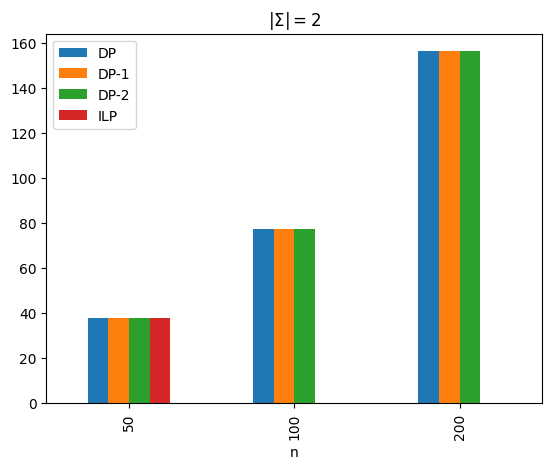

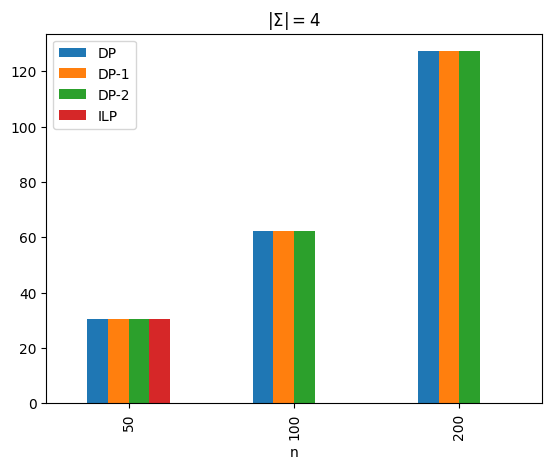

In [58]:
y_cols=["DP-obj", "DP-1obj", "DP-2obj", "ILPobj"]
cols_names={y_cols[0]: "DP", y_cols[1]: "DP-1", y_cols[2]: "DP-2", y_cols[3]: "ILP" }
merged_sigma2.rename(columns=cols_names, inplace=True)

merged_sigma2.plot(kind="bar", x="n", y=["DP", "DP-1", "DP-2", "ILP" ])  #y=["DP-obj", "DP-1obj", "DP-2obj", "ILPobj"])

plt.title("$|\Sigma|=2$")
plt.savefig("sigma-2-solutions.png")

merged_sigma4.rename(columns=cols_names, inplace=True)
merged_sigma4.plot(kind="bar", x="n", y=["DP", "DP-1", "DP-2", "ILP" ]) #y=["DP-obj", "DP-1obj", "DP-2obj", "ILPobj"])
plt.title("$|\Sigma|=4$")
plt.savefig("sigma-4-solutions.png")

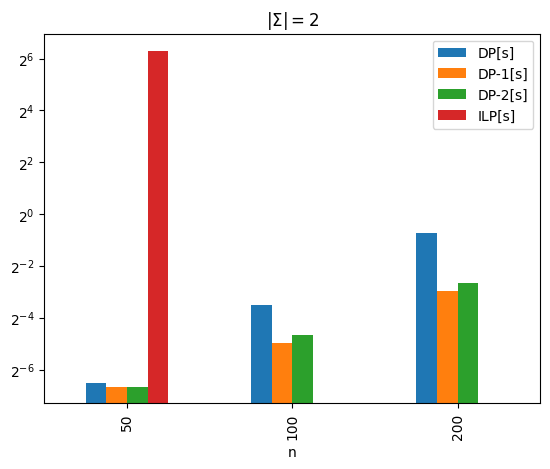

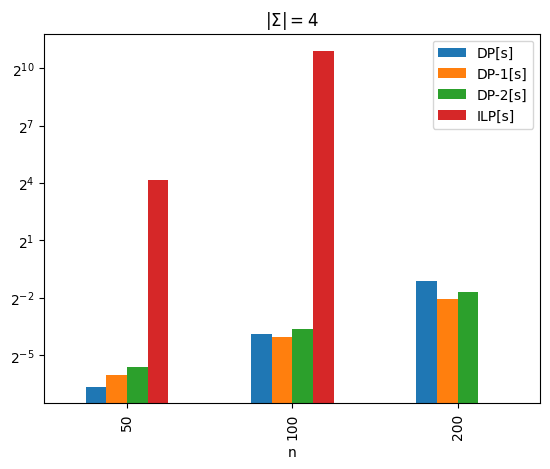

In [59]:
## display times:
y_cols_times=["DP-time", "DP-1time", "DP-2time", "ILPtime"]
cols_names={y_cols_times[0]: "DP[s]", y_cols_times[1]:  "DP-1[s]", y_cols_times[2]:  "DP-2[s]", y_cols_times[3]:  "ILP[s]"  }
merged_sigma2.rename(columns=cols_names, inplace=True)

merged_sigma2.plot(kind="bar", x="n", y=["DP[s]", "DP-1[s]", "DP-2[s]", "ILP[s]" ]) #y=["DP-time", "DP-1time", "DP-2time", "ILPtime"])
plt.title("$|\Sigma|=2$")
plt.yscale('log', base=2)
plt.savefig("sigma-2-times.png")

merged_sigma4.rename(columns=cols_names, inplace=True)
merged_sigma4.plot(kind="bar", x="n",  y=["DP[s]", "DP-1[s]", "DP-2[s]", "ILP[s]"] ) #y=["DP-time", "DP-1time", "DP-2time", "ILPtime"])
plt.title("$|\Sigma|=4$")
plt.yscale('log', base=2)
plt.savefig("sigma-4-times.png")